In [1]:
%load_ext autoreload
%autoreload 2

# Ocetrac: morphological image processing for monitoring ocean temperature extremes

____

By Hillary Scannell

## Overview

Dangerous hot-water events, called marine heatwaves, cause prolonged periods of thermal stress in the marine environment that can lead to widespread coral bleaching, harmful algal blooms, unproductive fisheries, and even economic loss. Anticipating the paths of destructive marine heatwaves remains a challenge owing to the complex spatiotemporal evolution of these events. We present a novel open source package called Ocetrac that implements morphological image processing and tracking to aid in the analysis of marine heatwave detection and movement. We discuss how this approach can be applied to monitor other extreme ocean conditions, such as deoxygenation and acidification.


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt
import s3fs
import xarray as xr
import scipy.ndimage
from skimage.measure import regionprops 
from skimage.measure import label as label_np
import dask.array as dsa

In [3]:
endpoint_url = 'https://ncsa.osn.xsede.org'
fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},)

path = "Pangeo/pangeo-forge/noaa_oisst/v2.1-avhrr.zarr"
ds = xr.open_zarr(fs_osn.get_mapper(path), consolidated=True)
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 14532, zlev: 1)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1981-09-01T12:00:00 ... 2021-06-14T12:00:00
  * zlev     (zlev) float32 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 dask.array<chunksize=(20, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 dask.array<chunksize=(20, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 dask.array<chunksize=(20, 1, 720, 1440), meta=np.ndarray>
    sst      (time, zlev, lat, lon) float32 dask.array<chunksize=(20, 1, 720, 1440), meta=np.ndarray>
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    cdm_data_type:              Grid
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    creator_email:              ois

/tmp/ipykernel_8224/2367621144.py:10: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)


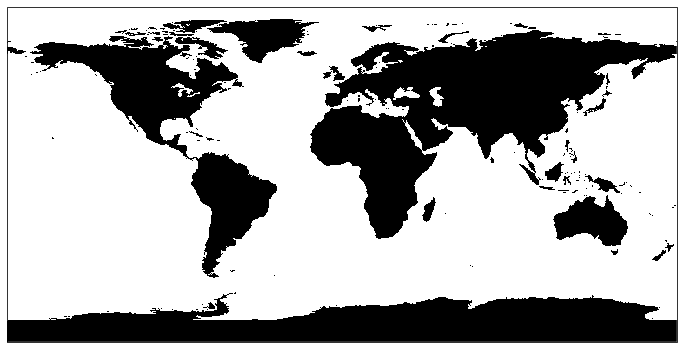

In [6]:
# Define a mask
mask = ds.sst.isel(time=0, zlev=0).fillna(-999)
mask = mask.where(mask==-999, other = 1)
mask = mask.where(mask==1, other = 0)

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
mask.plot(transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap='Greys_r', extend='max', add_colorbar=False, label=False)
ax.set_title('')
ax.background_patch.set_visible(False)